In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# defining the column names
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
# reading the .data file using pandas
df = pd.read_csv('Data/auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)
#making a copy of the dataframe
data = df.copy()

# Exploratory Data Analysis

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [51]:
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

As we can see, there are 6 null values in `Horsepower`. Lets dive into this one further.

In [52]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<AxesSubplot:xlabel='Horsepower', ylabel='Density'>

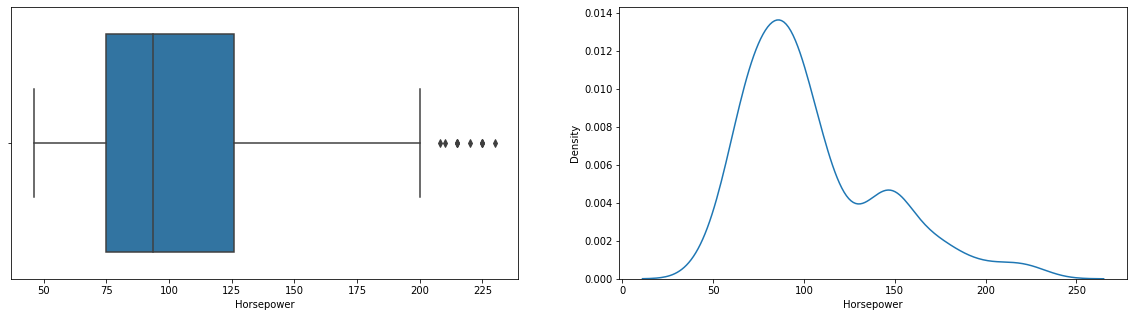

In [53]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
sns.boxplot(x=data['Horsepower'], ax=ax[0])
sns.kdeplot(x=data['Horsepower'], ax=ax[1])

Since there are few outliers, lets use the median of the column to impute the missing values using the pandas `median()` method

In [54]:
## imputing values with the median
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Lets look now at the categorical distribution of the variables

Text(0.5, 1.0, 'Origin')

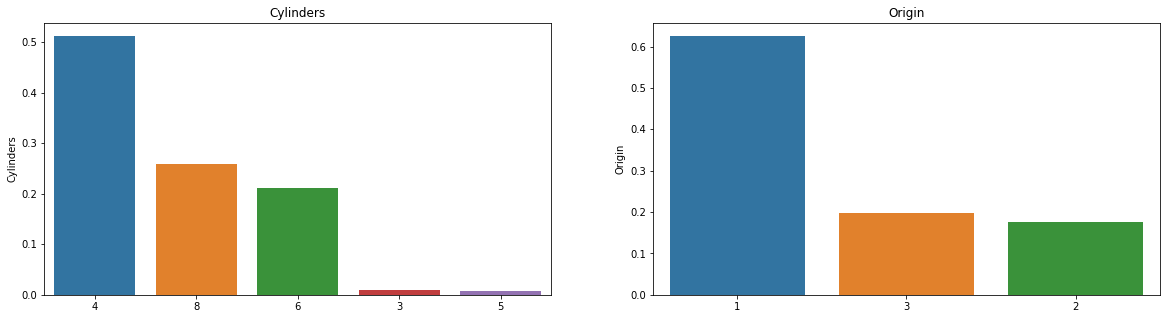

In [71]:
cylinders = pd.DataFrame(data['Cylinders'].value_counts(normalize=True))
origin = pd.DataFrame(data['Origin'].value_counts(normalize=True))

fig, ax = plt.subplots(1,2, figsize=(20, 5))
sns.barplot(data=cylinders, y='Cylinders', x=cylinders.index, ax=ax[0], 
            order=cylinders.sort_values('Cylinders', ascending=False).index)
sns.barplot(data=origin, y='Origin', x=origin.index, ax=ax[1],
            order=origin.sort_values('Origin', ascending=False).index)
ax[0].set_title('Cylinders')
ax[1].set_title('Origin')